#  Amazon Recommender system

## Business Understanding
The main aim of this project is to develop a recommender system using Amazon prodducts which will recomend new goods to users based on the products that they purchased 

## Data Understanding
Our data was collected  from Kaggle ,here is the link : https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset.
Under this section we will deal with the following :
 1. Data Inspection
 2. Data Description

In [2]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import regex
import re
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Inspection

In [3]:
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df["rating"].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

### Data Description

In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [8]:
print(f"Our data shape has {df.shape[1]} columns and {df.shape[0]} rows")

Our data shape has 16 columns and 1465 rows


## Data Cleaning

In [9]:
def check_clean (data):
    # check for missing values
    print("Missing values")
    print("_______")
    null = data.isna().sum()
    print(null)
    

    # check for  duplicates
    print("Duplicated Values")
    print("________")
    dups = data.duplicated().sum()
    print(f"The data contains {dups}  duplicated values")
    
    
# calling our function 
check_clean(df)

Missing values
_______
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
Duplicated Values
________
The data contains 0  duplicated values


In [10]:
df.fillna(method="ffill",inplace=True)

In [11]:
df = df.drop_duplicates("product_name",keep = "last")

In [12]:
df["product_name"].drop_duplicates(inplace=True)

# reset the index
df.reset_index(drop=True, inplace=True)

In [13]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [14]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,₹499,₹999,50%,4.2,"1,79,691",USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...


In [15]:
#  changing the column names 
col_names={"product_id" : "ProductID", "product_name" : "Product","category" : "Category", "discounted_price": "DiscountedPrice",
            "actual_price" : "Price","discount_percentage" : "Discount(%)","rating" : "Rating", "rating_count" : "RatingCount",
            "about_product" : "About","user_id":"UserID","user_name" : "UserName","review_id":"ReviewID","review_title":"ReviewTitle",
            "review_content":"Reviews","img_link" :"images","product_link" :"Product_link"}


# applying the rename columns to change the columns
df.rename(columns = col_names, inplace = True)
df.head()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,UserName,ReviewID,ReviewTitle,Reviews,images,Product_link
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,₹499,₹999,50%,4.2,"1,79,691",USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹13,999","₹24,999",44%,4.2,"32,840","Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹11,499","₹19,990",42%,4.3,"4,703",Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹14,999","₹19,999",25%,4.2,"34,899",Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹32,999","₹45,999",28%,4.2,"7,298",Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...


In [16]:
df.isna().sum()

ProductID          0
Product            0
Category           0
DiscountedPrice    0
Price              0
Discount(%)        0
Rating             0
RatingCount        0
About              0
UserID             0
UserName           0
ReviewID           0
ReviewTitle        0
Reviews            0
images             0
Product_link       0
dtype: int64

In [17]:
df.dtypes

ProductID          object
Product            object
Category           object
DiscountedPrice    object
Price              object
Discount(%)        object
Rating             object
RatingCount        object
About              object
UserID             object
UserName           object
ReviewID           object
ReviewTitle        object
Reviews            object
images             object
Product_link       object
dtype: object

In [18]:
df['Rating'].value_counts()

4.1    221
4.3    206
4.2    201
4.4    114
3.9    114
4.0    106
3.8     84
4.5     68
4       52
3.7     41
3.6     34
3.5     26
4.6     16
3.3     15
3.4     10
4.7      6
3.1      4
4.8      3
5.0      3
3.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: Rating, dtype: int64

In [19]:
# Removing the special characters from each column
df["DiscountedPrice"] = df["DiscountedPrice"].astype("str").str.replace("₹","").str.replace(",","").astype(float)
df["Price"] = df["Price"].astype("str").str.replace("₹"," ").str.replace(",","").astype(float)
df["Discount(%)"] = df["Discount(%)"].astype("str").str.replace("%","").astype(float)
df["RatingCount"] = df["RatingCount"].astype("str").str.replace(",","").astype(float)
df["Rating"] =  df["Rating"].astype("str").str.replace("|","1").astype(float)

C:\Users\danie\AppData\Local\Temp\ipykernel_12628\4050269914.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Rating"] =  df["Rating"].astype("str").str.replace("|","1").astype(float)


In [20]:
# correcting the discount percentange
df

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,UserName,ReviewID,ReviewTitle,Reviews,images,Product_link
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1333,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-am

### Checking for outliers using Plotly

In [21]:
# checking for outliers 

for column in ["DiscountedPrice","Price","Discount(%)","RatingCount","Rating"]:
    fig = px.box(df, y=column)
    fig.show()

We can see that apart from the  percentage discount that all other numerical columns have outliers.The outliers won't be dropped.

In [22]:
df.dtypes

ProductID           object
Product             object
Category            object
DiscountedPrice    float64
Price              float64
Discount(%)        float64
Rating             float64
RatingCount        float64
About               object
UserID              object
UserName            object
ReviewID            object
ReviewTitle         object
Reviews             object
images              object
Product_link        object
dtype: object

In [23]:
df.head(1)

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,UserName,ReviewID,ReviewTitle,Reviews,images,Product_link
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...


### Feature Engineering
Creating new columns to give more insights

In [24]:
# Creating the original price before applying the discount
df["Originalprice"] = df.apply(lambda x : x["Price"] + x["DiscountedPrice"],axis = 1)
df.head()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,UserName,ReviewID,ReviewTitle,Reviews,images,Product_link,Originalprice
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0


In [25]:
df["discount_price"]=df.apply(lambda x :x["Price"]-x["DiscountedPrice"],axis=1)

In [26]:
df["Category"].value_counts()

Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          161
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        64
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               60
Electronics|WearableTechnology|SmartWatches                                                                                 54
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                51
                                                                                                                          ... 
Home&Kitchen|CraftMaterials|DrawingMaterials|DrawingMedia|Pencils|WoodenPencils                                              1
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                 

In [27]:
# spliting the category columns to get the main and sub category
df["maincategory"] = df.apply(lambda x : x["Category"].split('|')[0],axis = 1)
df["subcategory"] = df.apply(lambda x : x["Category"].split("|")[-1],axis=1)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        1337 non-null   object 
 1   Product          1337 non-null   object 
 2   Category         1337 non-null   object 
 3   DiscountedPrice  1337 non-null   float64
 4   Price            1337 non-null   float64
 5   Discount(%)      1337 non-null   float64
 6   Rating           1337 non-null   float64
 7   RatingCount      1337 non-null   float64
 8   About            1337 non-null   object 
 9   UserID           1337 non-null   object 
 10  UserName         1337 non-null   object 
 11  ReviewID         1337 non-null   object 
 12  ReviewTitle      1337 non-null   object 
 13  Reviews          1337 non-null   object 
 14  images           1337 non-null   object 
 15  Product_link     1337 non-null   object 
 16  Originalprice    1337 non-null   float64
 17  discount_price

In [29]:
def pricebin (price):
    """A function that bins price"""
    if price <= 500:
        return "0-500"
    elif price >500 and price <= 1000 :
        return "500-1000"
    elif price > 1000 and price <= 1500:
        return "1000-1500"
    else :
        return "> 1500"
    
df["org_bin"] = df["Originalprice"].apply(pricebin)
df["price_bin"] = df["Price"].apply(pricebin)

In [30]:
##Binning the Price and Original Price into Bins
 #bins = [0.,300,600,900,1300]
#labels = ['<300','300-600','600-900','>900' ]
 
# binning the original price
#df["org_bin"] = pd.cut(df["Originalprice"], bins=bins, labels=labels)
#df["price_bin"] = pd.cut(df["Price"], bins=bins, labels=labels)

In [31]:
# Binning Discount percentage into different categories
def disc_cat (discount):
    """A function that bins Discount percentage"""
    if discount <= 30 :
        return "Low Discount"
    elif discount > 30 and discount <= 60:
        return "Medium Discount"
    else :
        return "High Discount"
    
    
df["Dis_bin"]= df["Discount(%)"].apply(disc_cat)
df.head()
    

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,Reviews,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount


In [32]:
def reviews(review):
    if "Good" in review:
        return "Positive"
    else:
        return "Negative"

df["Rev"] = df["Reviews"].apply(reviews)
df

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,1298.0,540.0,Home&Kitchen,WaterPurifierAccessories,1000-1500,500-1000,Medium Discount,Negative
1333,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,5325.0,765.0,Home&Kitchen,Rice&PastaCookers,> 1500,> 1500,Low Discount,Positive
1334,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,5299.0,861.0,Home&Kitchen,HeatConvectors,> 1500,> 1500,Low Discount,Negative
1335,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,

In [33]:
df.head()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive


In [34]:
# copying the original dataframe 
df1 = df.copy()
df1.head(1)

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive


In [35]:
# dropping columns that aren't needed
df1.drop(["UserID","UserName","ReviewID","images","Product_link"],axis=1)

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,ReviewTitle,Reviews,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",1298.0,540.0,Home&Kitchen,WaterPurifierAccessories,1000-1500,500-1000,Medium Discount,Negative
1333,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",5325.0,765.0,Home&Kitchen,Rice&PastaCookers,> 1500,> 1500,Low Discount,Positive
1334,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468.0,International design and styling|Two heat sett...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",5299.0,861.0,Home&Kitchen,HeatConvectors,> 1500,> 1500,Low Discount,Negative
1335,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,3289.0,491.0,Home&Kitchen,ExhaustFans,> 1500,> 1500,Low Discount,Positive


## Exploratory Data Analysis

### Univariate Analysis

In [36]:
for i, column in enumerate(["DiscountedPrice","Price","Discount(%)","RatingCount","Rating","Originalprice","maincategory",
                            "org_bin","price_bin","Dis_bin","Rev"]):
    fig = px.histogram(df1, x=column)
    fig.update_layout(
    title=dict(text=f"Distribution of {column}", font=dict(size=20), automargin=True, yref='paper')
)
    fig.show()


### Bivariate Analysis

In [37]:
df1.head()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive


### Product Categories with the highest price

In [38]:
df.head(1)

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive


## Top Categories Based on Price

In [39]:
def top (data,column1,column2) :
    "A function that groups the top categries based on a certain factor"
    # sort the values in ascending order
    df_group = data.groupby(column1)[column2].mean().sort_values(ascending = False)
    # Reset the index of the DataFrame to make it easier
    df_group = df_group.reset_index()
    
    #Create a bar plot using plotly
    fig = px.bar(df_group, x = column1 , y = column2,color = column2 )
    fig.update_layout(
    title=dict(text=f"Top {column1} based on {column2}", font=dict(size=20), automargin=True, yref='paper'))
    fig.show()
    
# getting the top 10 products
def top_10(data,column1,column2):
    """A function that groups the top 10 categories based on a certain factor"""
    df_group10  = data.groupby(column1)[column2].mean().sort_values(ascending = False).head(10)
    # Reset the index
    df_group10 = df_group10.reset_index()
    
    ## Creating a bar plot using plotly
    fig = px.bar(df_group10, x = column1 ,y = column2, color = column2 )
    fig.update_layout(
    title=dict(text=f"Top {column1} based on {column2}", font=dict(size=20), automargin=True, yref='paper'))
    fig.show()
    
# Scatter plot using seabon
def scatter (data,col1,col2):
    """A function that plots scatter plot betweeb two  variables"""
    plt.figure(figsize=(16,8))
    sns.scatterplot(data=data, x=col1, y=col2)
    plt.title(f"Relationship between {col1} and {col2}")

In [40]:
top(df1,"maincategory","Price")

##  Top categories based on Discount

In [41]:

top(df,"maincategory","Discount(%)")

In [42]:
df.head()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive


## Top rated products

In [43]:
top(df1,"maincategory","Rating")

In [44]:
top_10(df1,"subcategory","Price")

In [45]:
top_10(df1,"subcategory","Discount(%)")


In [46]:
top_10(df1,"subcategory","Rating")

### Relationship between Discounted Price and Rating

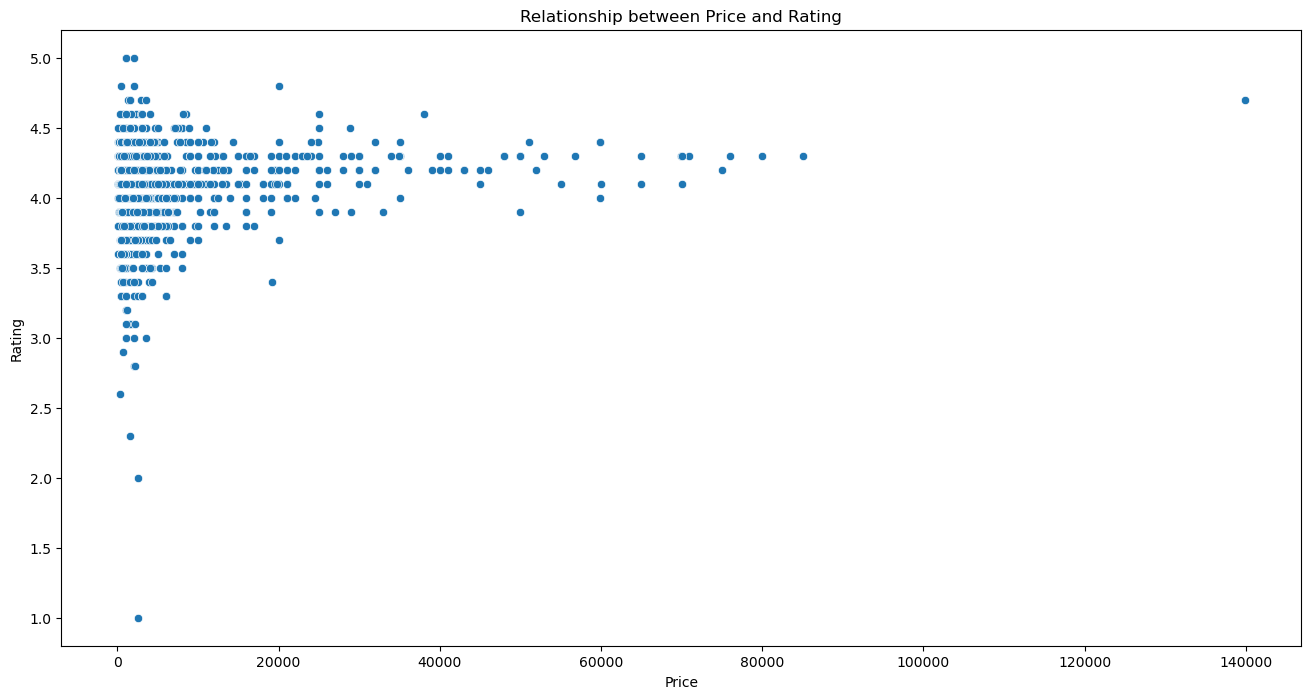

In [47]:
scatter(df1,"Price","Rating")

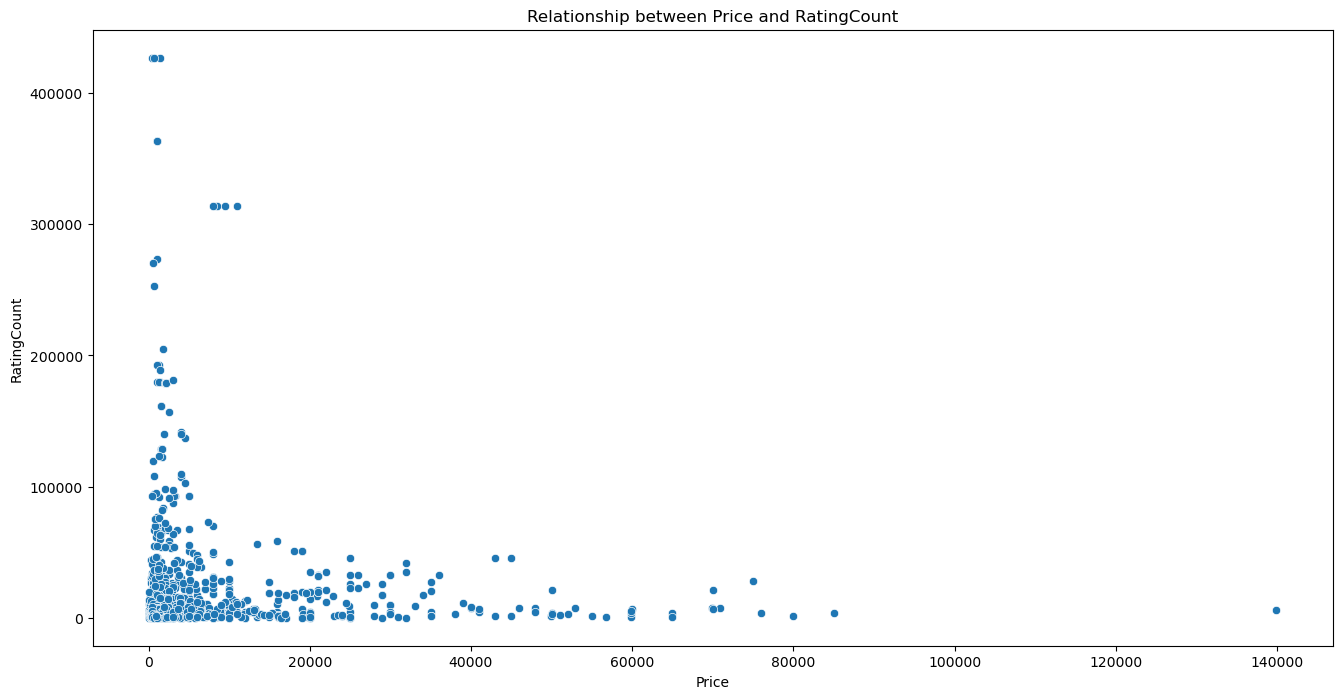

In [48]:
scatter(df1,"Price","RatingCount")

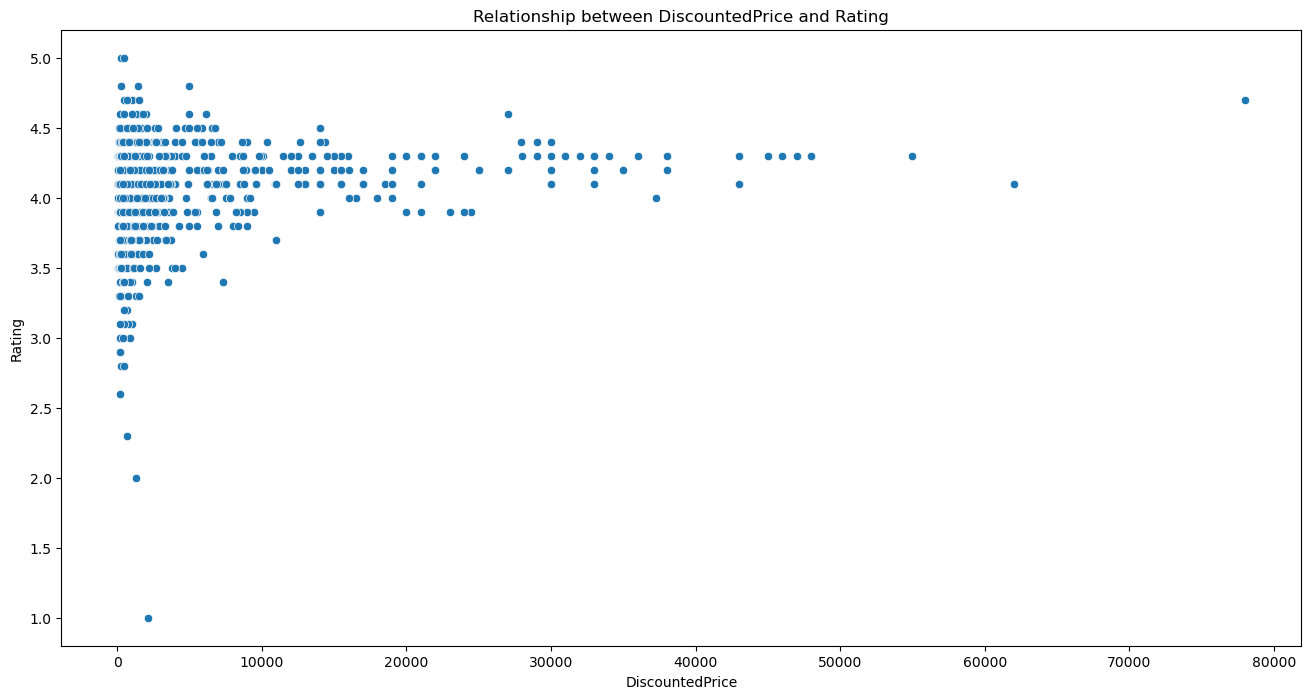

In [49]:
scatter(df1,"DiscountedPrice","Rating")

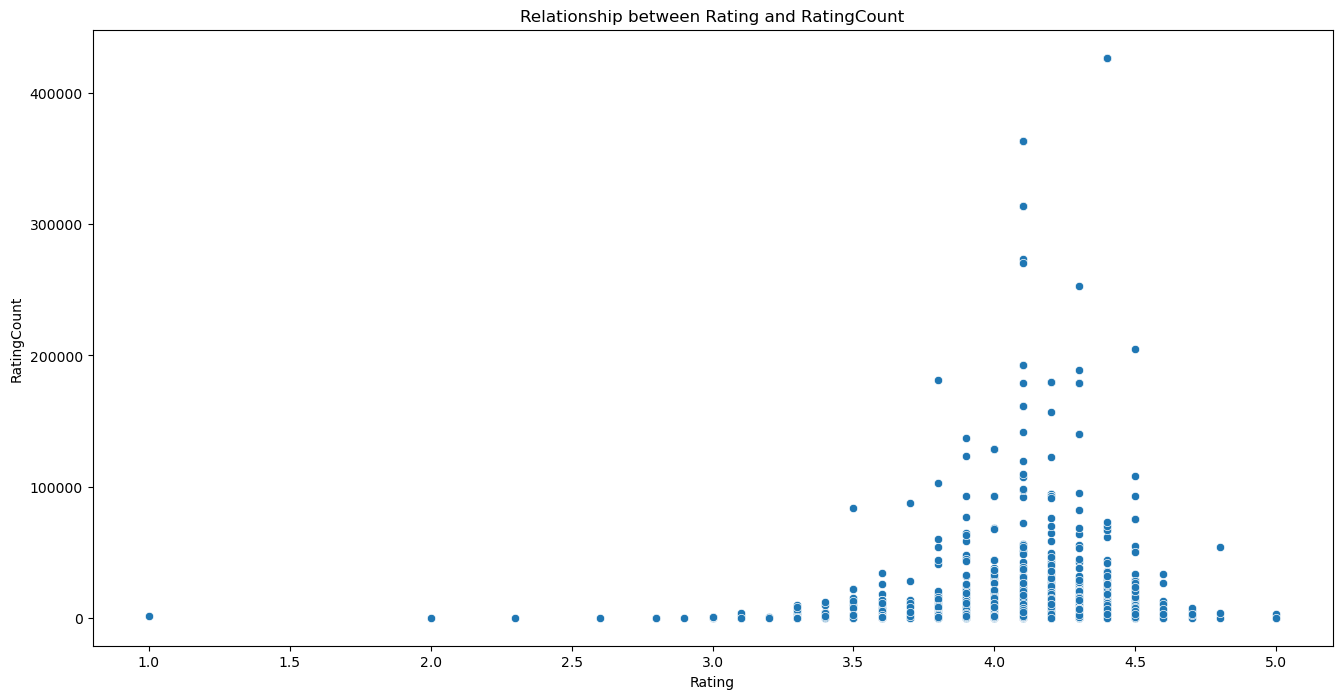

In [50]:
scatter (df1,"Rating","RatingCount")

## Correlation Heat Map

In [51]:
df.corr()

C:\Users\danie\AppData\Local\Temp\ipykernel_12628\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,DiscountedPrice,Price,Discount(%),Rating,RatingCount,Originalprice,discount_price
DiscountedPrice,1.000000,0.966007,-0.234488,0.123724,-0.025126,0.987303,0.782841
Price,0.966007,1.000000,-0.120927,0.122770,-0.035397,0.994807,0.917083
Discount(%),-0.234488,-0.120927,1.000000,-0.151322,0.003960,-0.166629,0.070580
Rating,0.123724,0.122770,-0.151322,1.000000,0.096177,0.124151,0.104683
RatingCount,-0.025126,-0.035397,0.003960,0.096177,1.000000,-0.031643,-0.046447
Originalprice,0.987303,0.994807,-0.166629,0.124151,-0.031643,1.000000,0.871740
discount_price,0.782841,0.917083,0.070580,0.104683,-0.046447,0.871740,1.000000


C:\Users\danie\AppData\Local\Temp\ipykernel_12628\482325210.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

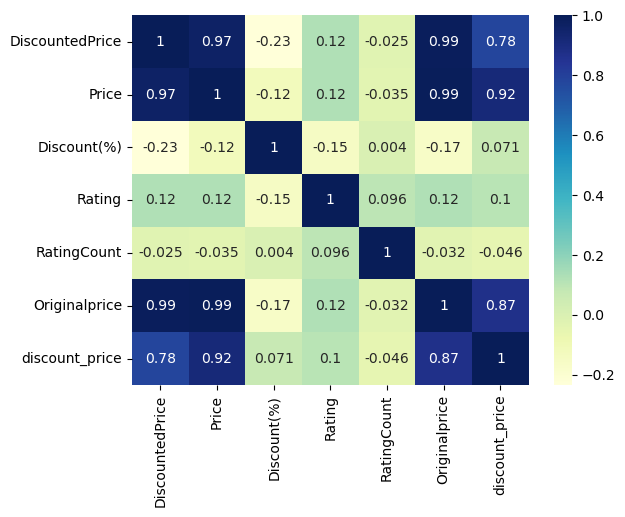

In [52]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [53]:
df.head()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive


## TEXT CLEANING AND VISUALIZATION
At this stage we are going to clean and visualize the review and review title column

In [54]:
df1['Reviews']

0       I use this to connect an old PC to internet. I...
1       Pros- xiomi 5a is best in budget-Nice picture ...
2       About the TV - Wonderful----------------------...
3       This OnePlus TV is great if you want a afforda...
4       I am posting this after a few weeks of using t...
                              ...                        
1332    I received product without spanner,Excellent p...
1333    ok,got everything as mentioned but the measuri...
1334    plastic but cool body ,u have to find sturdy s...
1335    I have installed this in my kitchen working fi...
1336    It does it job perfectly..only issue is temp c...
Name: Reviews, Length: 1337, dtype: object

In [55]:
punct_list = list(string.punctuation)

In [56]:
# lower casing the texts

def lowercase(text):
    """A function that  lowercases texts characters """
    return text.lower()

# punctuations
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    """A function that removes punctuation"""
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

 # A function that removes numbers   
def remove_small_words(text):
    
    """This function removes words with length 1 or 2"""
    clean = re.compile(r'\b\w{1,2}\b')
        
    return re.sub(clean, '', text)
# A function that removes special characters
def remove_special_characters(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Normalize unicode characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Remove special characters using regular expressions and keep only alphanumeric characters
    pattern = re.compile(r'[\W_]+')
    filtered_tokens = [token for token in tokens if not pattern.match(token)]
    
    # Join the filtered tokens back into a single text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [57]:
df1["Reviews"]

0       I use this to connect an old PC to internet. I...
1       Pros- xiomi 5a is best in budget-Nice picture ...
2       About the TV - Wonderful----------------------...
3       This OnePlus TV is great if you want a afforda...
4       I am posting this after a few weeks of using t...
                              ...                        
1332    I received product without spanner,Excellent p...
1333    ok,got everything as mentioned but the measuri...
1334    plastic but cool body ,u have to find sturdy s...
1335    I have installed this in my kitchen working fi...
1336    It does it job perfectly..only issue is temp c...
Name: Reviews, Length: 1337, dtype: object

In [58]:
df1.columns

Index(['ProductID', 'Product', 'Category', 'DiscountedPrice', 'Price',
       'Discount(%)', 'Rating', 'RatingCount', 'About', 'UserID', 'UserName',
       'ReviewID', 'ReviewTitle', 'Reviews', 'images', 'Product_link',
       'Originalprice', 'discount_price', 'maincategory', 'subcategory',
       'org_bin', 'price_bin', 'Dis_bin', 'Rev'],
      dtype='object')

In [59]:
df1["Reviews"] = df1["Reviews"].astype(str)
#

# Applying functions on the Review Column
df1["Reviews"] = df1["Reviews"].apply(lambda x : lowercase(x))
df1["Reviews"] = df1["Reviews"].apply(lambda x : remove_punctuation(x,punct_list))
df1["Reviews"] = df1["Reviews"].apply(lambda x : remove_special_characters(x))

# Text cleaning on the  About Column
df["About"] = df["About"].apply(lambda x : lowercase(x))
df["About"] = df["About"].apply (lambda x : remove_punctuation(x,punct_list))
df["About"] = df["About"].apply(lambda x : remove_special_characters(x))

# Text cleaning the product Column






In [60]:
df1["Reviews"]

0       i use this to connect an old pc to internet i ...
1       pros xiomi 5a is best in budget nice picture q...
2       about the tv wonderful probably the best tv in...
3       this oneplus tv is great if you want a afforda...
4       i am posting this after a few weeks of using t...
                              ...                        
1332    i received product without spanner excellent p...
1333    ok got everything as mentioned but the measuri...
1334    plastic but cool body u have to find sturdy su...
1335    i have installed this in my kitchen working fi...
1336    it does it job perfectly only issue is temp co...
Name: Reviews, Length: 1337, dtype: object

In [61]:
df.to_csv ('clean.csv',index =True)

### Wordcloud on The Review Titles and The Reviews

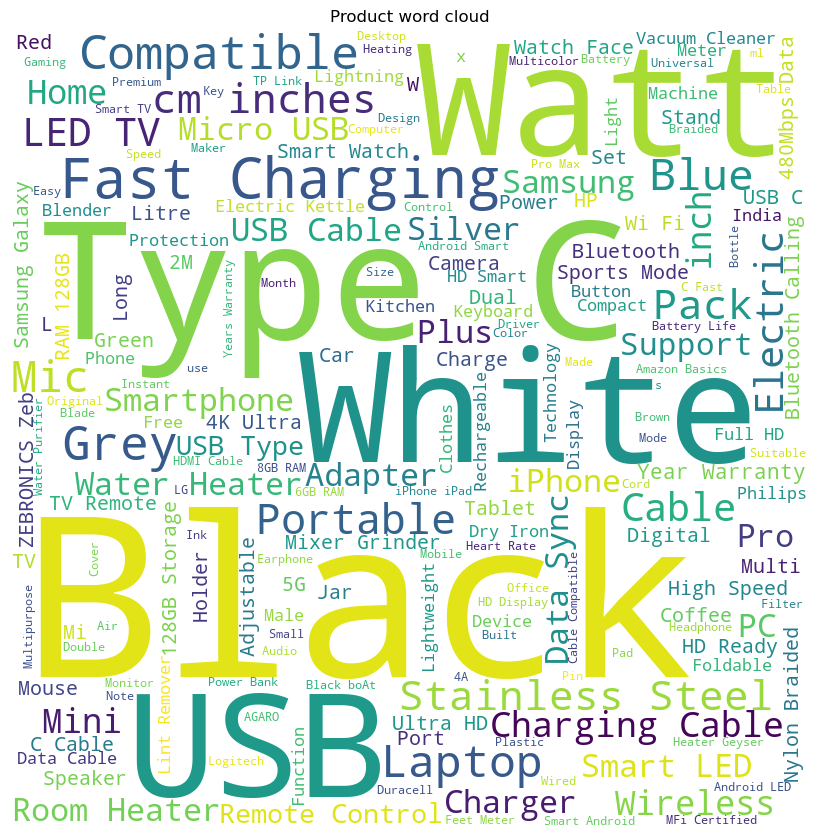

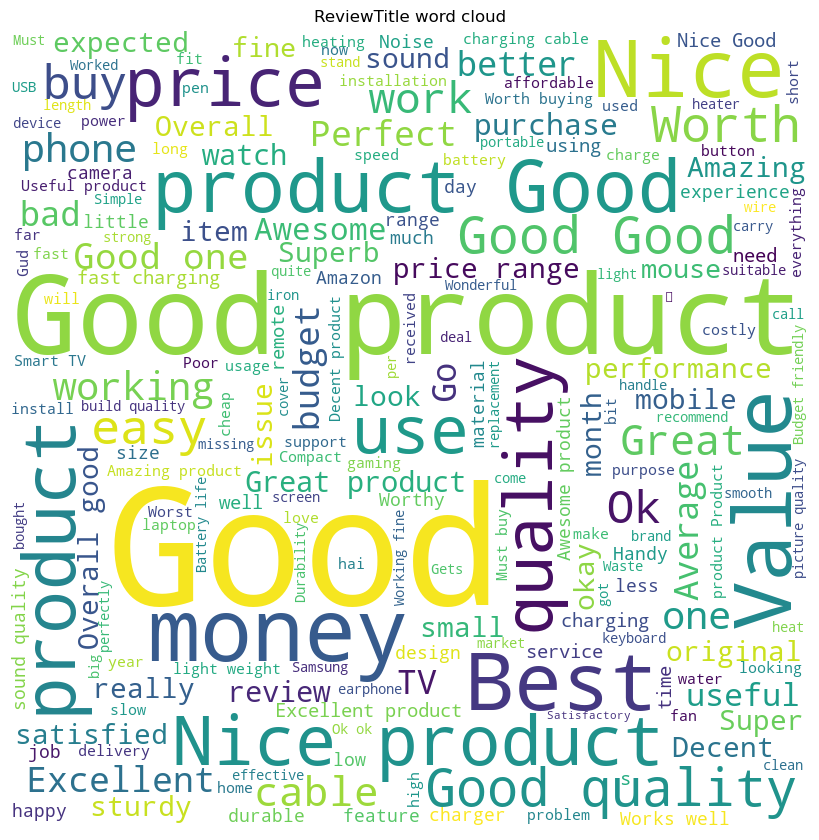

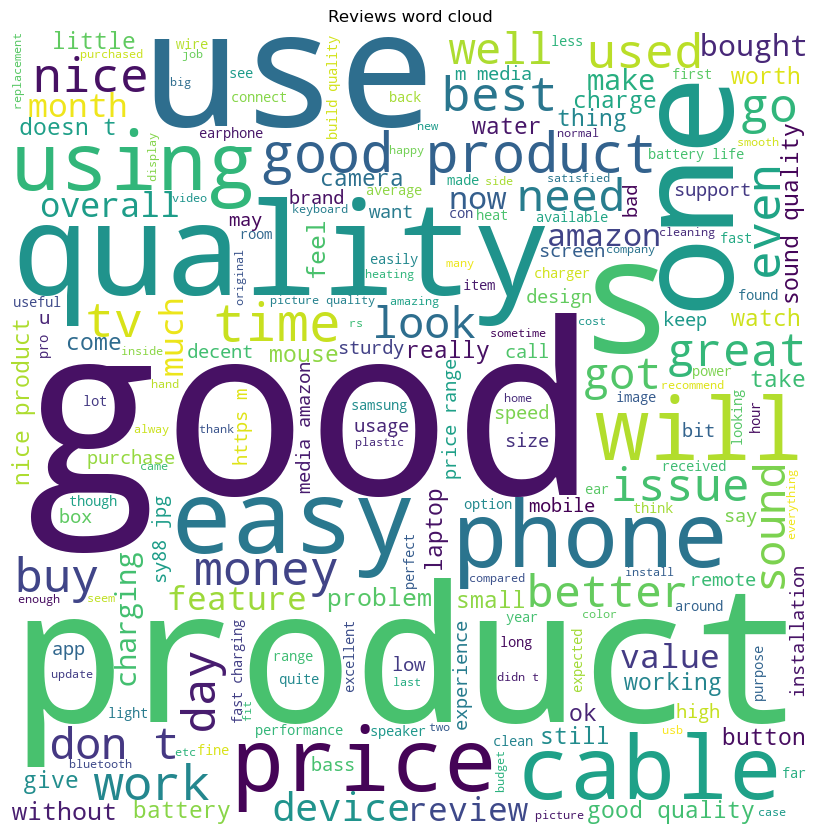

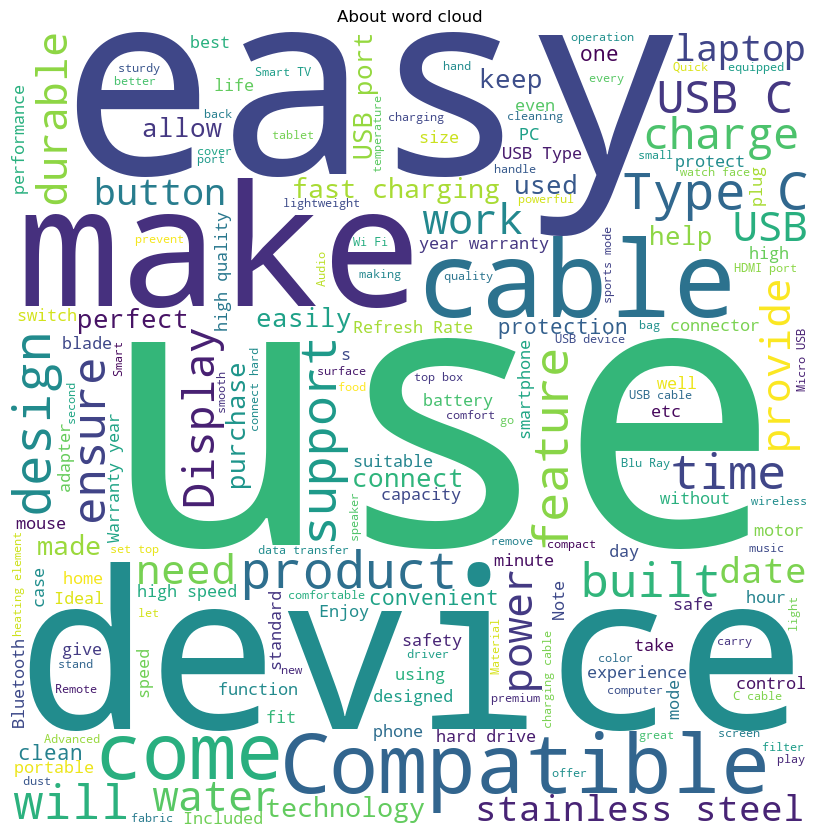

In [62]:
# A function that plots a wordcloud
def wordcloud(data,column):
    text = ' '.join(data[column])

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                
                    min_font_size = 10).generate(text)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f'{column} word cloud')
    
    
# Calling the above function on the ReviewTitle Column
for col in ["Product","ReviewTitle","Reviews","About"]:
    wordcloud(df1,col)

# Building A Recommender System

In [63]:
df

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,usb wifi adapter speedy wireless transmission ...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,note the brands mi and xiaomi are part of the ...,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,resolution 4k ultra hd 3840x2160 bezel less de...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,supreme quality 90 gram 3 layer thik pp spun f...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,1298.0,540.0,Home&Kitchen,WaterPurifierAccessories,1000-1500,500-1000,Medium Discount,Negative
1333,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,230 volts 400 watts 1 year,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,5325.0,765.0,Home&Kitchen,Rice&PastaCookers,> 1500,> 1500,Low Discount,Positive
1334,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468.0,international design and styling two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,5299.0,861.0,Home&Kitchen,HeatConvectors,> 1500,> 1500,Low Discount,Negative
1335,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,8031.0,fan sweep area 230 mm noise level 40 45 db fan...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLU

In [64]:
df.dropna()

,ProductID,Product,Category,DiscountedPrice,Price,Discount(%),Rating,RatingCount,About,UserID,...,images,Product_link,Originalprice,discount_price,maincategory,subcategory,org_bin,price_bin,Dis_bin,Rev
0,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,usb wifi adapter speedy wireless transmission ...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,1498.0,500.0,Computers&Accessories,WirelessUSBAdapters,1000-1500,500-1000,Medium Discount,Positive
1,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,note the brands mi and xiaomi are part of the ...,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,38998.0,11000.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
2,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,31489.0,8491.0,Electronics,SmartTelevisions,> 1500,> 1500,Medium Discount,Positive
3,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,34998.0,5000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
4,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,resolution 4k ultra hd 3840x2160 bezel less de...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...",...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,78998.0,13000.0,Electronics,SmartTelevisions,> 1500,> 1500,Low Discount,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,supreme quality 90 gram 3 layer thik pp spun f...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,1298.0,540.0,Home&Kitchen,WaterPurifierAccessories,1000-1500,500-1000,Medium Discount,Negative
1333,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,230 volts 400 watts 1 year,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,5325.0,765.0,Home&Kitchen,Rice&PastaCookers,> 1500,> 1500,Low Discount,Positive
1334,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468.0,international design and styling two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,5299.0,861.0,Home&Kitchen,HeatConvectors,> 1500,> 1500,Low Discount,Negative
1335,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,8031.0,fan sweep area 230 mm noise level 40 45 db fan...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLU

In [65]:
df.isna().sum()

ProductID          0
Product            0
Category           0
DiscountedPrice    0
Price              0
Discount(%)        0
Rating             0
RatingCount        0
About              0
UserID             0
UserName           0
ReviewID           0
ReviewTitle        0
Reviews            0
images             0
Product_link       0
Originalprice      0
discount_price     0
maincategory       0
subcategory        0
org_bin            0
price_bin          0
Dis_bin            0
Rev                0
dtype: int64

In [66]:
df_rec = df[['Product',"About",'maincategory']]

### Creating TF-IDF Matrix

In [67]:
# importing the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# filling null in the about column
df["About"] = df["About"].fillna("")

In [68]:
# creating the TF -IDF using the    About
tfidf_matrix = tfidf.fit_transform(df["About"])
tfidf_matrix.shape

(1337, 8988)

We can see that we have 1465 products  and 8906 unique words

 ### Calculating Cosine Similarities


In [69]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim[1]

array([0.07374311, 1.        , 0.41770383, ..., 0.00524419, 0.00363915,
       0.02796076])

We see the similarities of the 2nd product with  each other below

In [70]:
df['Product'].duplicated().sum()

0

## Recommending By using Similarities

In [71]:
indices = pd.Series(df.index, index = df["Product"])
indices = indices[~indices.index.duplicated(keep ='last')]
indices

Product
TP-Link USB WiFi Adapter for PC(TL-WN725N), N150 Wireless Network Adapter for Desktop - Nano Size WiFi Dongle Compatible with Windows 11/10/7/8/8.1/XP/ Mac OS 10.9-10.15 Linux Kernel 2.6.18-4.4.3       0
MI 80 cm (32 inches) 5A Series HD Ready Smart Android LED TV L32M7-5AIN (Black)                                                                                                                           1
Acer 80 cm (32 inches) I Series HD Ready Android Smart LED TV AR32AR2841HDFL (Black)                                                                                                                      2
OnePlus 80 cm (32 inches) Y Series HD Ready LED Smart Android TV 32Y1 (Black)                                                                                                                             3
OnePlus 126 cm (50 inches) Y Series 4K Ultra HD Smart Android LED TV 50Y1S Pro (Black)                                                                                          

I need to get the movies indices  because our cosine similarity calculated matrix works based on indices

In [72]:
product_index =indices['Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)']
product_index

1335

In [73]:
cosine_sim[product_index]

array([0.01337277, 0.00363915, 0.01730984, ..., 0.14763752, 1.        ,
       0.03126982])

Creating a dataframe using the above similarities

In [74]:
## Creating a dataframe using th
similarity_scores = pd.DataFrame(cosine_sim[product_index],columns = ["score"])
similarity_scores

,score
0,0.013373
1,0.003639
2,0.017310
3,0.012113
4,0.004751
...,...
1332,0.000000
1333,0.088485
1334,0.147638
1335,1.000000


I can get similar products by using the above similarity scores

In [75]:
product_indices = similarity_scores.sort_values("score",ascending=False)[0:5].index
df["Product"].iloc[product_indices]

1335    Havells Ventil Air DSP 230mm Exhaust Fan (Pist...
1303      Havells Ventil Air DX 200mm Exhaust Fan (White)
996     Luminous Vento Deluxe 150 mm Exhaust Fan for K...
1070    Crompton Sea Sapphira 1200 mm Ultra High Speed...
1159    Crompton Hill Briz Deco 1200mm (48 inch) High ...
Name: Product, dtype: object

Putting it all i a function for easier deployment

In [76]:
def recommender (Product,df = df):
    # importing TfidfVectorizer
    tfidf = TfidfVectorizer(stop_words='english')

    # filling null in the about column
    df["About"] = df["About"].fillna("")
    # creating the TF -IDF using the    About
    tfidf_matrix = tfidf.fit_transform(df["About"])
    # Calculating the cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
    # getting the indices
    indices = pd.Series(df.index, index = df["Product"])
    indices = indices[~indices.index.duplicated(keep ='last')]
    product_index =indices[Product]
    # Creating a DataFframe based on the cosine similarity
    similarity_scores = pd.DataFrame(cosine_sim[product_index],columns = ["score"])
    product_indices = similarity_scores.sort_values("score",ascending=False)[0:5].index
    # using the indices and score to recommend products
    return df["Product"].iloc[product_indices]

SyntaxError: invalid syntax (1900318991.py, line 1)

In [ ]:
recommender("OnePlus 126 cm (50 inches) Y Series 4K Ultra HD Smart Android LED TV 50Y1S Pro (Black)")

4      OnePlus 126 cm (50 inches) Y Series 4K Ultra H...
26     OnePlus 108 cm (43 inches) Y Series 4K Ultra H...
30     OnePlus 108 cm (43 inches) Y Series Full HD Sm...
14     OnePlus 80 cm (32 inches) Y Series HD Ready Sm...
155    OnePlus 138.7 cm (55 inches) U Series 4K LED S...
Name: Product, dtype: object